In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from statsmodels.tsa.arima_model import ARIMA


import warnings

from matplotlib import pyplot

# from pyramid.arima import auto_arima
from pandas.plotting import autocorrelation_plot
from math import sqrt



In [2]:
def parsealldate(x):
    timestamp = pd.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
#     timestamp = timestamp.dt.ceil(freq='s') 
    return timestamp

In [23]:
trainData = pd.read_csv("../parse_tactics/normalized_tva_server_1_tactic_1_train.csv",  parse_dates=[0])
testData = pd.read_csv("../parse_tactics/normalized_tva_server_1_tactic_1_test.csv", parse_dates=[0])
trainData['timestamp'] = trainData.timestamp.dt.ceil(freq='s')
testData['timestamp'] = testData.timestamp.dt.ceil(freq='s')

In [24]:
trainData = trainData.set_index('timestamp')['cost']
testData = testData.set_index('timestamp')['cost']

# trainData.index = pd.DatetimeIndex(trainData.index).to_period('S')
# testData.index = pd.DatetimeIndex(testData.index).to_period('S')



In [25]:
trainData = trainData.dropna()

In [27]:
bestModel = auto_arima(trainData, trace=True, error_action='ignore', suppress_warnings=True,method='nm')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-72302.760, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-64311.382, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-68081.865, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-72306.288, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-64313.382, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-72306.379, Time=2.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-72303.087, Time=1.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-72303.079, Time=1.96 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-72304.865, Time=2.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-69473.947, Time=1.96 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-72309.458, Time=1.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-72308.795, Time=1.51 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-68083.863, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-72306.749, Time=1.16 sec
 ARIM

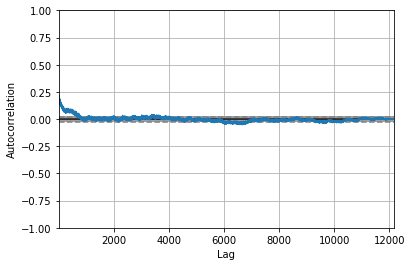

In [28]:

autocorrelation_plot(trainData)


In [31]:
def runArima(trainData, testData, p,d,q, modelName, solver):
    
    model = ARIMA(trainData, order=(p,d,q))
    model_fit = model.fit(solver = solver)
    model_fit.save('./arimaModels/'+ modelName + '.pkl')

    history = [x for x in trainData]
    
    predictions = list()
# walk-forward validation
    for t in range(len(testData)):

        walkForwardModel = ARIMA(history, order=(p,d,q))
        walkForwardModel_fit = walkForwardModel.fit(solver = solver,disp=False)
        output = walkForwardModel_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = testData[t]
        history.append(obs)
        

    return predictions

In [34]:

predictions = []
for i in range(1,4):
    trainFileName = "../parse_tactics/normalized_tva_server_"+str(i)+"_tactic_1_train.csv"
    testFileName = "../parse_tactics/normalized_tva_server_"+str(i)+"_tactic_1_test.csv"
    validationFileName = "../parse_tactics/normalized_tva_server_"+str(i)+"_tactic_1_validation.csv"
    
    trainData = pd.read_csv(trainFileName,  parse_dates=[0])
    testData = pd.read_csv(testFileName, parse_dates=[0])
    validationData = pd.read_csv(validationFileName, parse_dates=[0])
    
    trainData['timestamp'] = trainData.timestamp.dt.ceil(freq='s')
    testData['timestamp'] = testData.timestamp.dt.ceil(freq='s')
    validationData['timestamp'] = validationData.timestamp.dt.ceil(freq='s')
    
    trainData = trainData.set_index('timestamp')['cost']
    testData = testData.set_index('timestamp')['cost']
    validationData = validationData.set_index('timestamp')['cost']

    trainData.index = pd.DatetimeIndex(trainData.index).to_period('ms')
    testData.index = pd.DatetimeIndex(testData.index).to_period('ms')
    validationData.index = pd.DatetimeIndex(validationData.index).to_period('ms')

    trainData = trainData.append(validation)
    
    predictions.append(runArima(trainData,validationData,1,1,1,'cost_server'+str(i), solver = 'nm'))



Optimization terminated successfully.
         Current function value: -2.960784
         Iterations: 78
         Function evaluations: 139


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Optimization terminated successfully.
         Current function value: -2.803722
         Iterations: 31
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: -2.603330
         Iterations: 52
         Function evaluations: 93


In [35]:
for serverNum in range(len(predictions)):
    pd.DataFrame(predictions[serverNum]).to_csv('./arimaModels/predictions/predictions_server_' + str(serverNum + 1) + '_tactic_1_cost.csv')

In [36]:
for serverNum in range(len(predictions)):
    validationFileName = "../parse_tactics/normalized_tva_server_"+str(serverNum+1)+"_tactic_1_validation.csv"
    validationData = pd.read_csv(validationFileName, parse_dates=[0])
    validationData['timestamp'] = validationData.timestamp.dt.ceil(freq='s')
    validationData = validationData['cost']
    # validationData.index = pd.DatetimeIndex(validationData.index).to_period('ms')

    print(rmse(validationData, np.array(predictions[serverNum]).flatten(),axis=0))

0.0159778502717178
0.016327778680956195
0.014462387162487331
